## T5 (Text-To-Text Transfer Transformer)

This transformer model is trained on a variety of NLP tasks in a text-to-text framework, where the input and output are both text.

This allows the model to be fine-tuned on a variety of NLP tasks.

It's available in various model sizes: T5-small (60.5M), T5-base (223M), T5-large (738M), T5-3b, T5-11b

https://huggingface.co/google-t5

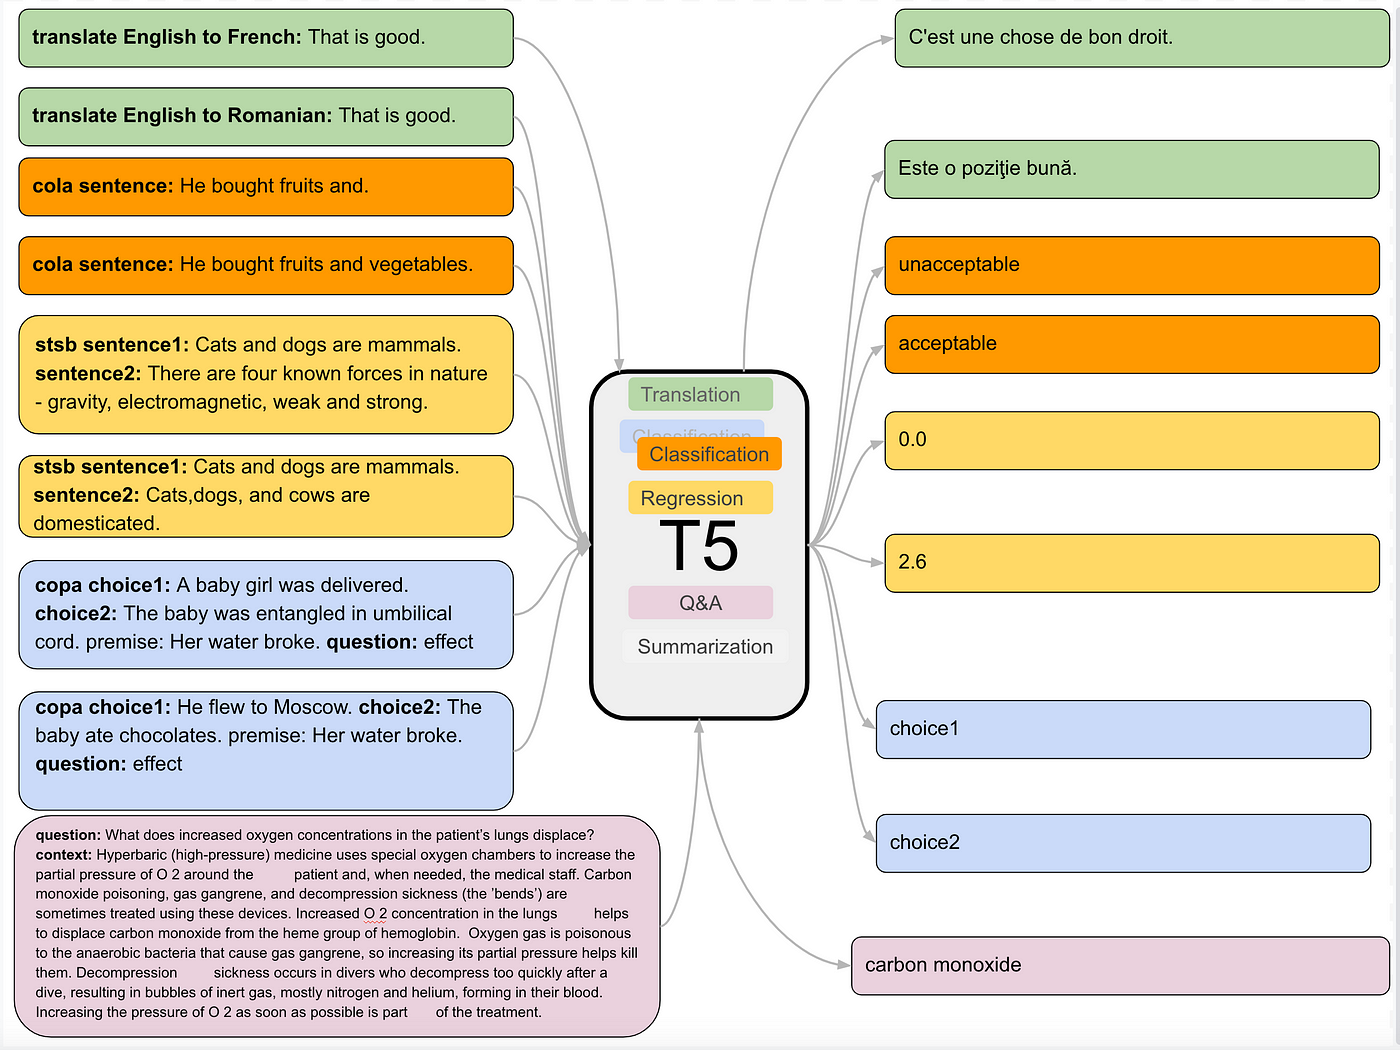

## T5 for Text summarization task

Text summarization is the task of summarizing a document or a paragraph into a shorter text.

In [1]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

/scratch/AzureNfsServer_INPUT1/vc_data/users/pateld/GenAutosuggest/Env/GenAutosuggest/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the T5 model and tokenizer.
model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# Let's define a document that we want to summarize.
document = """Brooklyn Nine-Nine is an American police procedural comedy television series that aired on Fox and later on NBC. Created by Dan Goor and Michael Schur, the show revolves around seven New York City Police Department (NYPD) detectives who are adjusting to life under their new commanding officer, the serious and stern Captain Raymond Holt (played by Andre Braugher). The ensemble cast includes Andy Samberg, Stephanie Beatriz, Terry Crews, Melissa Fumero, Joe Lo Truglio, Chelsea Peretti, Dirk Blocker, and Joel McKinnon Miller. The series originally premiered on September 17, 2013, and ran for eight seasons, totaling 153 episodes. It combines elements of police procedural drama with humor, making it a unique blend of genres"""


In [4]:
print(document)

Brooklyn Nine-Nine is an American police procedural comedy television series that aired on Fox and later on NBC. Created by Dan Goor and Michael Schur, the show revolves around seven New York City Police Department (NYPD) detectives who are adjusting to life under their new commanding officer, the serious and stern Captain Raymond Holt (played by Andre Braugher). The ensemble cast includes Andy Samberg, Stephanie Beatriz, Terry Crews, Melissa Fumero, Joe Lo Truglio, Chelsea Peretti, Dirk Blocker, and Joel McKinnon Miller. The series originally premiered on September 17, 2013, and ran for eight seasons, totaling 153 episodes. It combines elements of police procedural drama with humor, making it a unique blend of genres


In [5]:
# Let's encode the document using the T5 tokenizer.
input_ids = tokenizer.encode("summarize: " + document, return_tensors="pt")

# Let's generate the summary using the T5 model.
summary_ids = model.generate(input_ids, max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)

In [8]:
# Let's decode the summary and print it.
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)

Brooklyn Nine-nine is an american police procedural comedy tv series. it revolves around seven detectives who are adjusting to life under their new commanding officer, the serious and stern Captain Raymond Holt. the ensemble cast includes Andy Samberg, Stephanie Beatriz, Terry Crews, Melissa Fumero, Joe Lo Truglio, Chelsea Peretti, Dirk Blocker, and Joel McKinnon Miller.


## T5 for translation task

In [16]:
inp_text = "I like to eat pizza"

In [24]:
# Let's encode the document using the T5 tokenizer.
input_ids = tokenizer.encode("translate English to German: " + inp_text, return_tensors="pt")

# Let's generate the summary using the T5 model.
output_ids = model.generate(input_ids, max_length=15, min_length=10, num_beams=1, early_stopping=True)

In [25]:
# Let's decode the summary and print it.
translation = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(translation)

Ich essen gerne Pizza...


## T5 for sentiment classification

In [34]:
inp_text = "I hate Tom Cruise movie"

In [35]:
# Let's encode the document using the T5 tokenizer.
input_ids = tokenizer.encode("classify given sentence into positive or negative sentiment:  " + inp_text, return_tensors="pt")

# Let's generate the summary using the T5 model.
output_ids = model.generate(input_ids, max_length=2, min_length=1, num_beams=1, early_stopping=True)

In [36]:
# Let's decode the summary and print it.
sentiment = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(sentiment)

negative
